<a href="https://colab.research.google.com/github/Run-aivle/study/blob/main/study/March/03.27/SEN/SequenceModels(RNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 데이터 불러오기

In [1]:
# pip install -U finance-datareader

In [2]:
import FinanceDataReader as fdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow.keras as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error
from tensorflow.keras.utils import plot_model

In [3]:
# 삼성전자 종목
data = fdr.DataReader('005930', '2020-01-01', '2023-03-27')
data.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921


In [4]:
data.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921


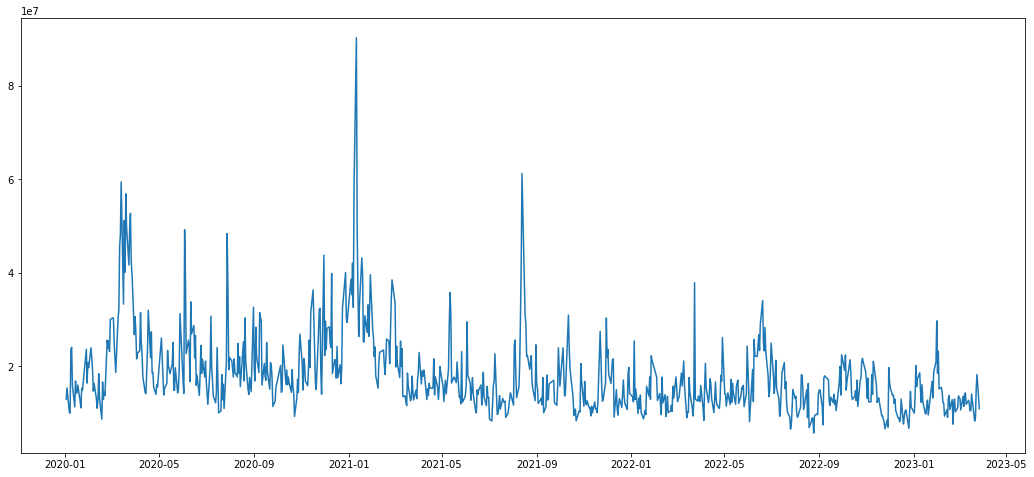

In [5]:
plt.figure(figsize = (18,8))
plt.plot(data['Volume'])
plt.show()

# 2. 데이터 준비

In [6]:
# 간단한 데이터로 변형
# 불필요한 컬럼 제거
data = data.drop(['Open', 'High', 'Low', 'Volume', 'Change'], axis = 1)
data.head()

,Close
Date,
2020-01-02,55200
2020-01-03,55500
2020-01-06,55500
2020-01-07,55800
2020-01-08,56800


In [7]:
data = data.values

In [8]:
data.shape

(800, 1)

In [9]:
timestep = 14
x = np.array([data[i : i+timestep, : ] for i in range(len(data) - timestep)])
y = np.array([data[i+timestep, -1] for i in range(len(data) - timestep)])

x_train, x_val, x_test = x[:503], x[503:629], x[629:]
y_train, y_val, y_test = y[:503], y[503:629], y[629:]

print(x.shape, y.shape)
print('---------------------')
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(786, 14, 1) (786,)
---------------------
(503, 14, 1) (503,)
(126, 14, 1) (126,)
(157, 14, 1) (157,)


# 3. Sequence 데이터 구조로 만들기

In [10]:
# 1. 세션클리어
keras.backend.clear_session()

# 2. model 발판 생성
model = keras.models.Sequential()

# 3. model 블록 조립
model.add(keras.layers.Input(shape = (14, 1)))
model.add(keras.layers.SimpleRNN(16, activation = 'tanh', return_sequences=True))
model.add(keras.layers.SimpleRNN(32, activation = 'tanh', return_sequences=True))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1,))

# 4. model compile
model.compile(loss = keras.losses.mean_squared_error,
              optimizer = 'adam')

# 5. model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 14, 16)            288       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 14, 32)            1568      
                                                                 
 flatten (Flatten)           (None, 448)               0         
                                                                 
 dense (Dense)               (None, 1)                 449       
                                                                 
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.fit(x_train, y_train,
          epochs = 30, validation_data = [x_val, y_val])

Epoch 1/30
16/16 [==============================] - 2s 30ms/step - loss: 4883202048.0000 - val_loss: 4397540352.0000
Epoch 2/30
16/16 [==============================] - 0s 8ms/step - loss: 4882441728.0000 - val_loss: 4396750848.0000
Epoch 3/30
16/16 [==============================] - 0s 8ms/step - loss: 4881500672.0000 - val_loss: 4395722752.0000
Epoch 4/30
16/16 [==============================] - 0s 8ms/step - loss: 4880355328.0000 - val_loss: 4394558464.0000
Epoch 5/30
16/16 [==============================] - 0s 9ms/step - loss: 4879134208.0000 - val_loss: 4393386496.0000
Epoch 6/30
16/16 [==============================] - 0s 9ms/step - loss: 4877923328.0000 - val_loss: 4392237056.0000
Epoch 7/30
16/16 [==============================] - 0s 9ms/step - loss: 4876740096.0000 - val_loss: 4391112704.0000
Epoch 8/30
16/16 [==============================] - 0s 9ms/step - loss: 4875577856.0000 - val_loss: 4390004736.0000
Epoch 9/30
16/16 [==============================] - 0s 8ms/step - loss:

In [12]:
y_pred = model.predict(x_test)

mean_squared_error(y_test, y_pred)**(0.5)

5/5 [==============================] - 0s 3ms/step


59330.28145131552